In [1]:
from utils.loader import FactoryLoader
from utils.ml import MLPipeline
from utils.preprocessing import PreprocessingFactory
from utils.feature_extraction import *
from utils.utils import *

In [2]:
VAL_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\val"
TRAIN_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\train"

In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

percent = 20
random = True

# Initialize the FactoryLoader
factory = PreprocessingFactory()
factory.gaussian_smoothing(3)
factory.crop_roi()
factory.clahe()
factory.pad2square(fill=np.nan)
factory.resize((200,200))
factory.normalize2float()

factory_loader = FactoryLoader(path=VAL_PATH, batch_size=24, factory=factory, percentage=percent, shuffle=random)

# Create the feature extraction pipeline strategy and add desired features
strategy = FeatureExtractionStrategy()

strategy.add_extractor(MeanExtractor())  # Add mean feature
strategy.add_extractor(StdExtractor())   # Add standard deviation feature
strategy.add_extractor(VarExtractor())   # Add variance feature

strategy.add_extractor(StdExtractor("lab"))   # Add standard deviation feature
strategy.add_extractor(VarExtractor("lab"))   # Add variance feature

strategy.add_extractor(StdExtractor("hsv"))   # Add standard deviation feature
strategy.add_extractor(VarExtractor("hsv"))   # Add variance feature

# Create classifiers
svm = SVC(C=1., kernel='linear', gamma="scale", probability=False, random_state=42, tol=0.0001)
rf = RandomForestClassifier(n_estimators=12)
xgb = XGBClassifier(n_estimators=12)

pipeline = MLPipeline(dataset_path=TRAIN_PATH, preprocessing_factory=factory, feature_strategy=strategy, classifiers=[svm, rf, xgb], percentage=percent, verbose=True, shuffle=False)

INFO:utils.ml:MLPipeline initialized with dataset path: C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\train
INFO:utils.ml:Preprocessing steps


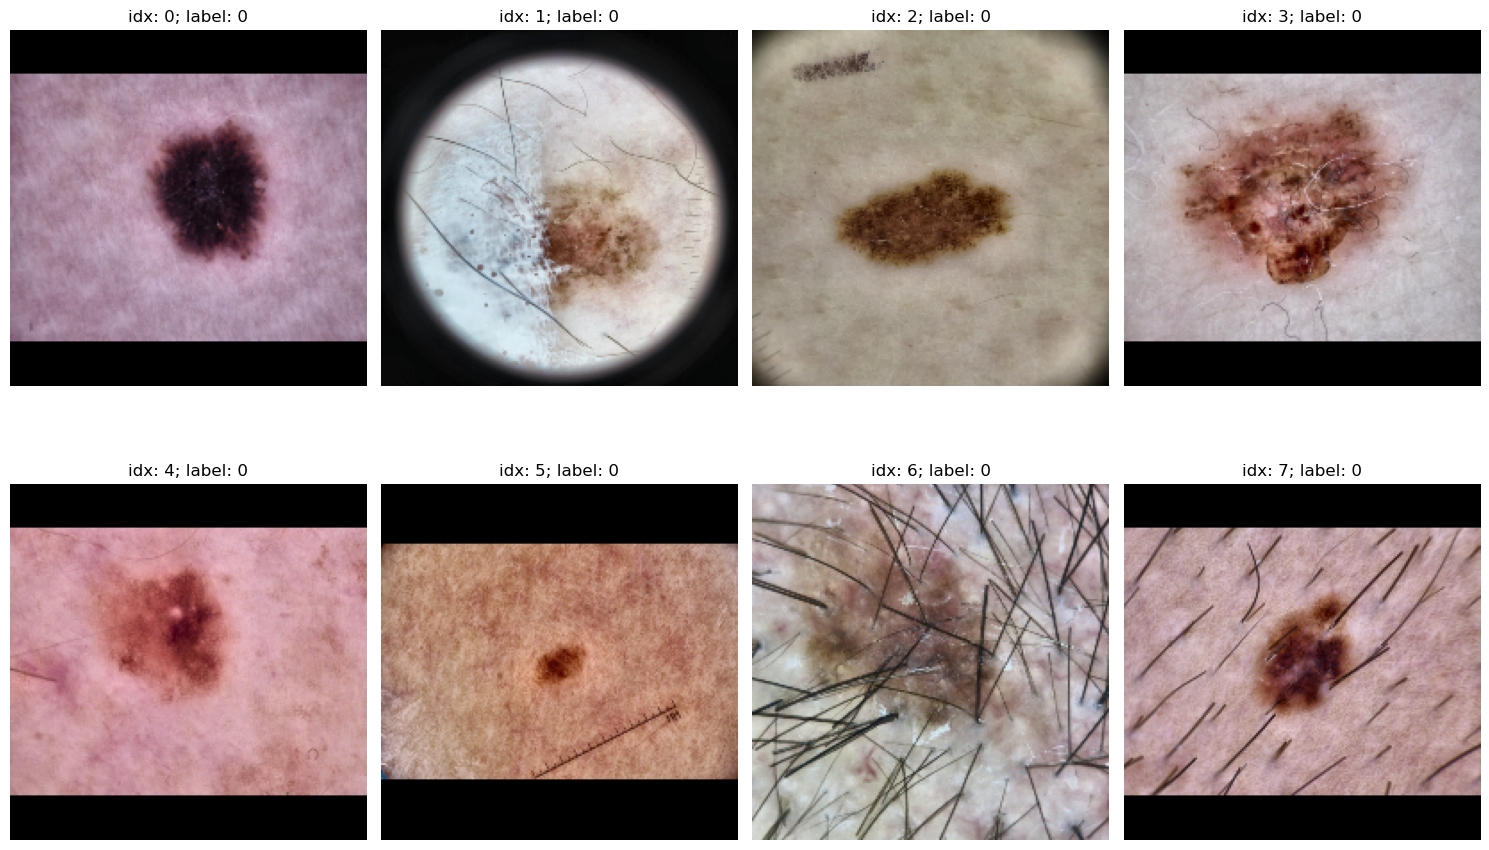

In [4]:
pipeline.loader.show_images()

In [5]:
pipeline.run_feature_extraction()

INFO:utils.ml:Running feature extraction...


Processed 5/95 batches.
Processed 10/95 batches.
Processed 15/95 batches.
Processed 20/95 batches.
Processed 25/95 batches.
Processed 30/95 batches.
Processed 35/95 batches.
Processed 40/95 batches.
Processed 45/95 batches.
Processed 50/95 batches.
Processed 55/95 batches.
Processed 60/95 batches.
Processed 65/95 batches.
Processed 70/95 batches.
Processed 75/95 batches.
Processed 80/95 batches.
Processed 85/95 batches.
Processed 90/95 batches.


INFO:utils.ml:Feature extraction completed. Extracted 3038 features.


Processed 95/95 batches.


In [6]:
print("Preprocessing steps")
print(pipeline.loader.get_transformation_steps())
print("\nFeature names")
print(pipeline.get_feature_names())
print("\nSize")
print(pipeline.feature_matrix.shape)

Preprocessing steps
{'smoothing': {'kernel_size': 3}, 'crop_roi': {'black_threshold_ratio': 0.1}, 'clahe': {'clip_limit': 2.0, 'tile_grid_size': (8, 8)}, 'pad2square': {'fill': nan}, 'resize': {'size': (200, 200)}, '01_norm': {}}

Feature names
['mean_rgb_channel_0', 'mean_rgb_channel_1', 'mean_rgb_channel_2', 'std_rgb_channel_0', 'std_rgb_channel_1', 'std_rgb_channel_2', 'var_rgb_channel_0', 'var_rgb_channel_1', 'var_rgb_channel_2', 'std_lab_channel_0', 'std_lab_channel_1', 'std_lab_channel_2', 'var_lab_channel_0', 'var_lab_channel_1', 'var_lab_channel_2', 'std_hsv_channel_0', 'std_hsv_channel_1', 'std_hsv_channel_2', 'var_hsv_channel_0', 'var_hsv_channel_1', 'var_hsv_channel_2']

Size
(3038, 21)


In [7]:
pipeline.fit_classifiers_async()
print(pipeline.fitted_classifiers)

INFO:utils.ml:Fitting classifiers asynchronously...
INFO:utils.ml:Fitting classifier: SVC
INFO:utils.ml:Fitting classifier: RandomForestClassifier
INFO:utils.ml:Fitting classifier: XGBClassifier
INFO:utils.ml:Classifier XGBClassifier completed in 0.04319262504577637 seconds.
INFO:utils.ml:Fitted classifier: XGBClassifier
INFO:utils.ml:Classifier RandomForestClassifier completed in 0.11327719688415527 seconds.
INFO:utils.ml:Fitted classifier: RandomForestClassifier
INFO:utils.ml:Classifier SVC completed in 286.1154239177704 seconds.
INFO:utils.ml:Fitted classifier: SVC
INFO:utils.ml:Fitting completed in 286.12 seconds.


{'XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=12, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'RandomForestClassifier': RandomForestClassifier(n_estimators=12), 'SVC': SVC(kernel='linear', random_state=42, tol=0.0001)}


In [11]:
pipeline.predict_with_classifiers(VAL_PATH, 100)

INFO:utils.ml:Predicting with classifiers on dataset: C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\val


Processed 5/119 batches.
Processed 10/119 batches.
Processed 15/119 batches.
Processed 20/119 batches.
Processed 25/119 batches.
Processed 30/119 batches.
Processed 35/119 batches.
Processed 40/119 batches.
Processed 45/119 batches.
Processed 50/119 batches.
Processed 55/119 batches.
Processed 60/119 batches.
Processed 65/119 batches.
Processed 70/119 batches.
Processed 75/119 batches.
Processed 80/119 batches.
Processed 85/119 batches.
Processed 90/119 batches.
Processed 95/119 batches.
Processed 100/119 batches.
Processed 105/119 batches.
Processed 110/119 batches.
Processed 115/119 batches.


INFO:utils.ml:Predictions made with classifier: XGBClassifier
INFO:utils.ml:Predictions made with classifier: RandomForestClassifier


Processed 119/119 batches.


INFO:utils.ml:Predictions made with classifier: SVC


{'GT': array([0, 0, 0, ..., 1, 1, 1]),
 'XGBClassifier': array([0, 0, 0, ..., 0, 0, 1]),
 'RandomForestClassifier': array([0, 0, 0, ..., 0, 0, 1]),
 'SVC': array([1, 0, 1, ..., 0, 0, 1])}

In [12]:
pipeline.calculate_metrics()

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}
INFO:utils.ml:Metrics for classifier XGBClassifier: {'accuracy': 0.7094309799789252, 'precision': 0.7219576237703009, 'recall': 0.7094309799789252, 'f1': 0.704226570585982}
INFO:utils.ml:Metrics for classifier RandomForestClassifier: {'accuracy': 0.7073234984193888, 'precision': 0.7258864782184116, 'recall': 0.7073234984193888, 'f1': 0.6999276916282937}
INFO:utils.ml:Metrics for classifier SVC: {'accuracy': 0.6614857744994731, 'precision': 0.6640021204375118, 'recall': 0.6614857744994731, 'f1': 0.6593232544215601}


{'GT': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0},
 'XGBClassifier': {'accuracy': 0.7094309799789252,
  'precision': 0.7219576237703009,
  'recall': 0.7094309799789252,
  'f1': 0.704226570585982},
 'RandomForestClassifier': {'accuracy': 0.7073234984193888,
  'precision': 0.7258864782184116,
  'recall': 0.7073234984193888,
  'f1': 0.6999276916282937},
 'SVC': {'accuracy': 0.6614857744994731,
  'precision': 0.6640021204375118,
  'recall': 0.6614857744994731,
  'f1': 0.6593232544215601}}